In [12]:
#1- import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#2- data
data = pd.read_csv('C:\\Users\\Bassam\\Desktop\\sales_data_fixed.csv')

print(data.head())




   Order ID     Product     Category  Quantity Ordered  Price Each  \
0         1  Smartphone  Electronics                 2         500   
1         2      Laptop  Electronics                 1        1000   
2         3  Headphones  Electronics                 3         150   
3         4  Smartphone  Electronics                 1         500   
4         5      Laptop  Electronics                 1        1000   

        Order Date  Customer ID         City   Region  
0  1/15/2023 14:45          101     New York     East  
1  2/10/2023 10:30          102  Los Angeles     West  
2  3/12/2023 12:15          103      Chicago  Midwest  
3   4/1/2023 18:00          101     New York     East  
4  5/20/2023 09:00          104      Houston    South  


In [13]:
#3- cleaning data


data['Order Date']=pd.to_datetime(data['Order Date'])

data.dropna(inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          6 non-null      int64         
 1   Product           6 non-null      object        
 2   Category          6 non-null      object        
 3   Quantity Ordered  6 non-null      int64         
 4   Price Each        6 non-null      int64         
 5   Order Date        6 non-null      datetime64[ns]
 6   Customer ID       6 non-null      int64         
 7   City              6 non-null      object        
 8   Region            6 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 564.0+ bytes
None


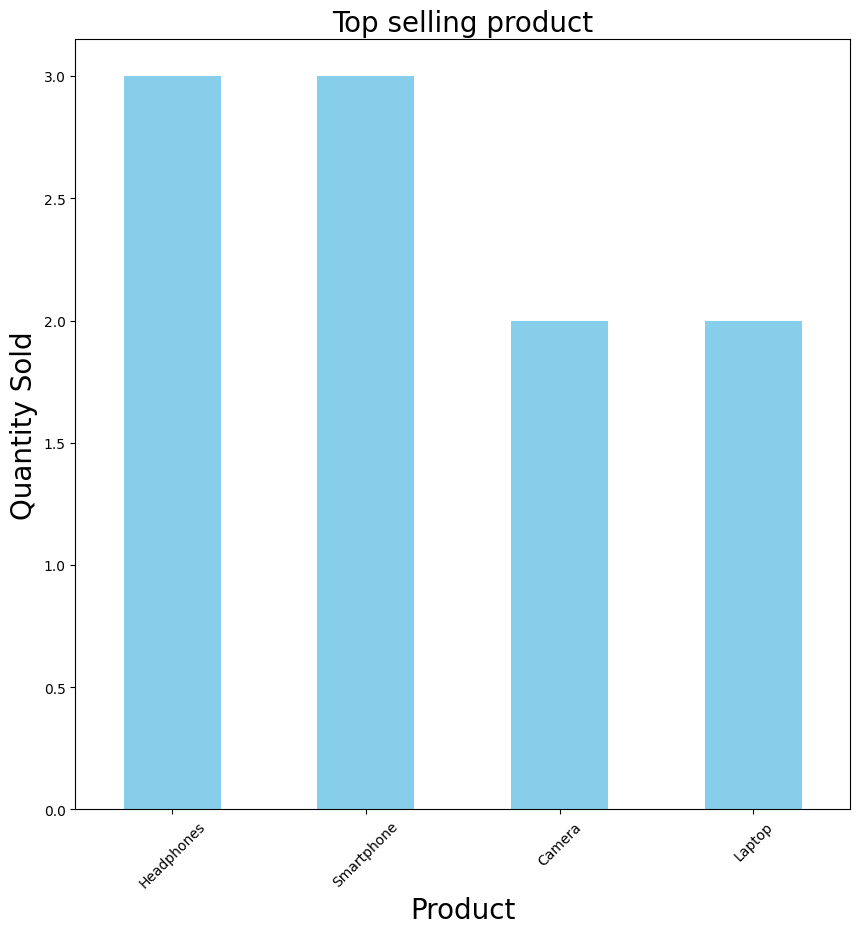

In [14]:
#4-1 Top Selling Products

product_sales=data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

#Visualize it
figure=plt.figure(figsize=(10,10))
product_sales.plot(kind='bar',color='skyblue')
plt.title('Top selling product',fontsize=20)
plt.xlabel('Product',fontsize=20)
plt.ylabel('Quantity Sold',fontsize=20)
plt.xticks(rotation=45)
plt.savefig(r'C:/Users/Bassam/Desktop/upwork/Top selling product.png')
plt.show()
plt.close()

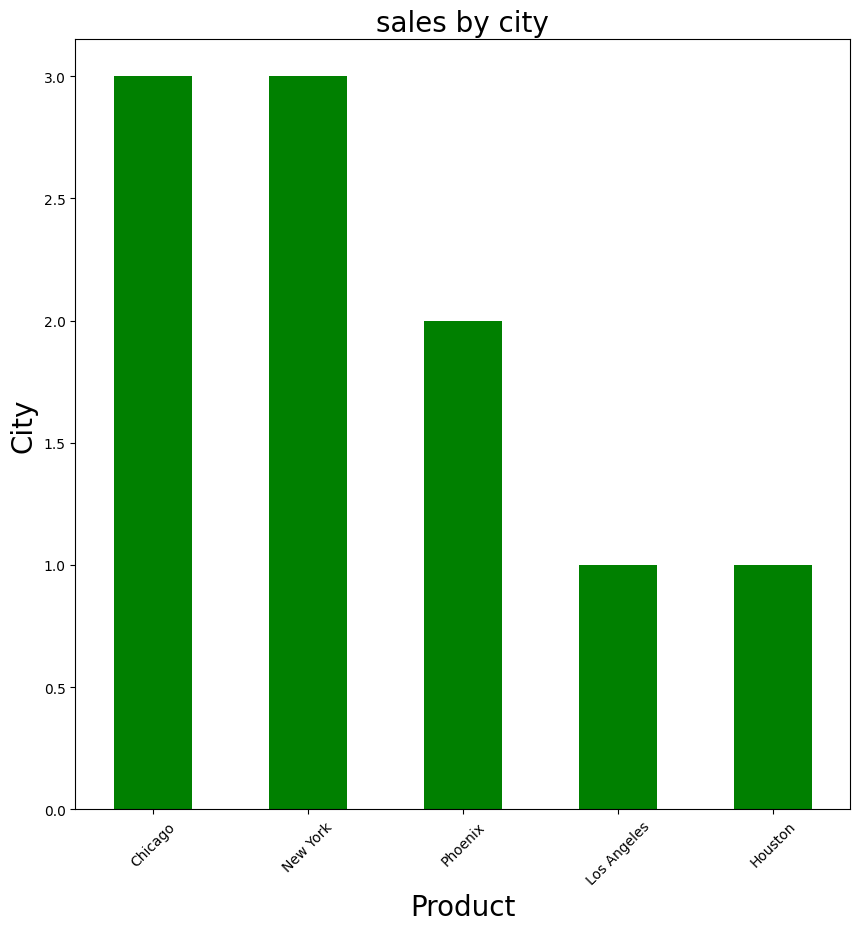

In [15]:
#4-2 sales by city

city_sales=data.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)
figure=plt.figure(figsize=(10,10))
city_sales.plot(kind='bar',color='g')
plt.title('sales by city',fontsize=20)
plt.xlabel('Product',fontsize=20)
plt.ylabel('City',fontsize=20)
plt.xticks(rotation=45)
plt.savefig(r'C:/Users/Bassam/Desktop/upwork/sales by city.png')
plt.show()
plt.close()

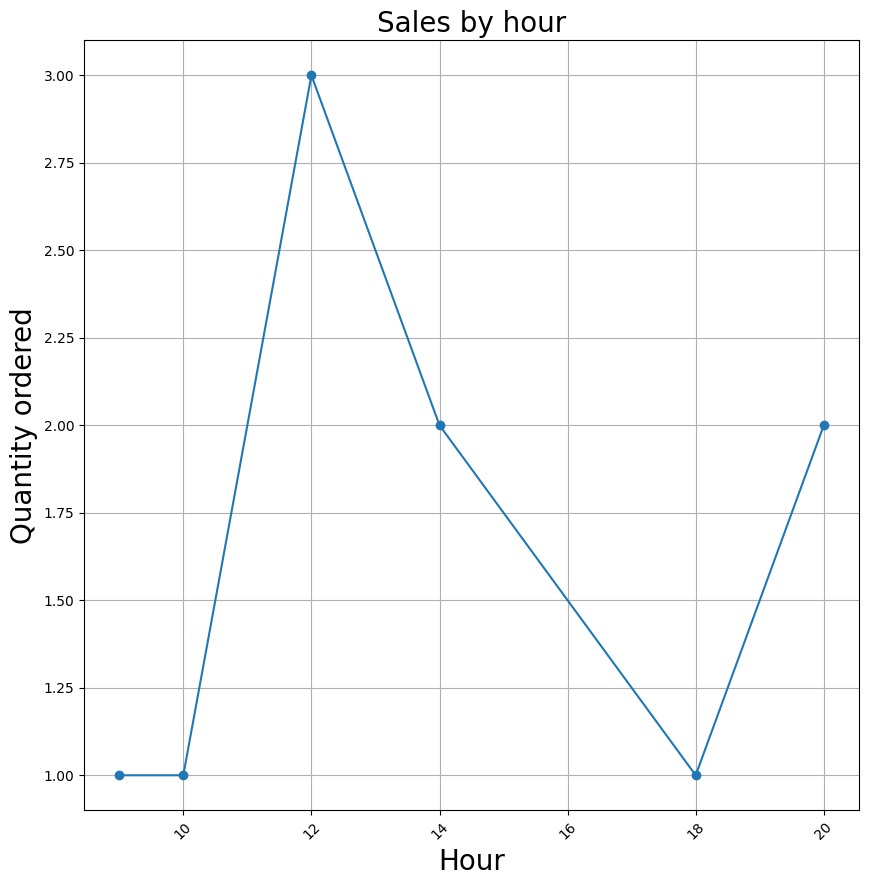

In [16]:
#4-3 the best hour for selling

data['Hour']=data['Order Date'].dt.hour

houly_sales=data.groupby('Hour')['Quantity Ordered'].sum()
#Visualize it
figure=plt.figure(figsize=(10,10))
houly_sales.plot(kind='line',marker='o')
plt.title('Sales by hour',fontsize=20)
plt.xlabel('Hour',fontsize=20)
plt.ylabel('Quantity ordered',fontsize=20)
plt.xticks(rotation=45)
plt.grid()
plt.savefig(r'C:/Users/Bassam/Desktop/upwork/Sales by hour.png')
plt.show()
plt.close()


In [17]:
#mean for each cutomer
average_orders=data.groupby('Customer ID')['Quantity Ordered'].mean()

print(f"Average Orders per Customer: {average_orders}")

#Overall Average
print(f"Average Orders per Customer: {average_orders.mean():.2f}")

Average Orders per Customer: Customer ID
101    1.5
102    1.0
103    3.0
104    1.0
105    2.0
Name: Quantity Ordered, dtype: float64
Average Orders per Customer: 1.70


In [18]:

summary=data.groupby('City').agg({'Price Each':'sum','Quantity Ordered':'sum'})
summary.to_excel(r'C:/Users/Bassam/Desktop/upwork/sales_summary.xlsx')